In [159]:
from jitcdde import t
from parameters import *
# from parameters_h_overall import *
import matplotlib.pyplot as plt
from msrDynamics import Node, System

In [160]:
# for estimation case

# params = [1.76e-03, 13.3e-03, 0.88e-03, 21.7e-03,
#           1.06e-03, 22.4e-03, 738e-03, 27.5e-03,
#           0.47e-03, 1.83e-03, 68.3e-03, 3.77594444e+02]

# params = [0.02187095, 0.0113666, 0.00104331, 0.00415982, 0.00266767, 0.0093217, 0.00080961, 0.00687754, 0.19685921, 0.00049369, 0.0741425] # sumsq_power

params = [2.26103880e-02, 6.35249293e-03, 5.01754655e-05, 7.79148981e-03,
          4.50255426e-03, 1.05622729e-02, 1.26345367e-03, 6.71738834e-03,
          1.02512617e-01, 2.30353891e-03, 7.33258046e-03]

hA_ft_c, hA_tc_c, hA_mc_c, hA_ft_hx, hA_ht_hx, hA_ct_hx, hA_th_hxch, \
hA_ht_hxhw, hA_tw_hxhw, hA_ht_hxhwc, hA_tw_hxhwc = params

P = 2.10

Instantiate System Object & Nodes

In [161]:
# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1, name = "c_f1")
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2, name = "c_f2")
c_t1 = Node(m = m_t, scp = scp_t, y0 = T0_c_t1, name = "c_t1")
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1, name = "c_c1")
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2, name = "c_c2") 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m + 1000, name = "c_m1")
n = Node(y0 = n_frac0, name = "n")
C1 = Node(y0 = C0[0], name = "C1")
C2 = Node(y0 = C0[1], name = "C2")
C3 = Node(y0 = C0[2], name = "C3")
C4 = Node(y0 = C0[3], name = "C4")
C5 = Node(y0 = C0[4], name = "C5")
C6 = Node(y0 = C0[5], name = "C6")
rho = Node(y0 = rho_0, name = "rho")

# add reactivity input
inserted = 0.0
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

# rho_ext = ARE.add_input(rho_insert, T)

# FUEL-HELIUM HX1
hx_fh1_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1, name = "hx_fh1_f1")
hx_fh1_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2, name = "hx_fh1_f2")
hx_fh1_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1, name = "hx_fh1_t1")
hx_fh1_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1, name = "hx_fh1_h1")
hx_fh1_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2, name = "hx_fh1_h2")

# FUEL-HELIUM HX2
hx_fh2_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1, name = "hx_fh2_f1")
hx_fh2_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2, name = "hx_fh2_f2")
hx_fh2_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1, name = "hx_fh2_t1")
hx_fh2_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1, name = "hx_fh2_h1")
hx_fh2_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2, name = "hx_fh2_h2")

# COOLANT-HELIUM HX1
hx_ch1_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1, name = "hx_ch1_c1")
hx_ch1_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2, name = "hx_ch1_c2")
hx_ch1_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hch_t1, name = "hx_ch1_t1")
hx_ch1_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1, name = "hx_ch1_h1")
hx_ch1_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2, name = "hx_ch1_h2")

# COOLANT-HELIUM HX2
hx_ch2_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1, name = "hx_ch2_c1")
hx_ch2_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2, name = "hx_ch2_c2")
hx_ch2_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hfh_t1, name = "hx_ch2_t1")
hx_ch2_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1, name = "hx_ch2_h1")
hx_ch2_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2, name = "hx_ch2_h2")

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1, name = "hx_hwf1_h1")
hx_hwf1_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2, name = "hx_hwf1_h2")
hx_hwf1_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwf1_t1")
hx_hwf1_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1, name = "hx_hwf1_w1")
hx_hwf1_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2, name = "hx_hwf1_w2")

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1, name = "hx_hwf2_h1")
hx_hwf2_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2, name = "hx_hwf2_h2")
hx_hwf2_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwf2_t1")
hx_hwf2_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1, name = "hx_hwf2_w1")
hx_hwf2_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2, name = "hx_hwf2_w2")

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1, name = "hx_hwc1_h1")
hx_hwc1_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2, name = "hx_hwc1_h2")
hx_hwc1_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwc1_t1")
hx_hwc1_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1, name = "hx_hwc1_w1")
hx_hwc1_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2, name = "hx_hwc1_w2")

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1, name = "hx_hwc2_h1")
hx_hwc2_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2, name = "hx_hwc2_h2")
hx_hwc2_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1, name = "hx_hwc2_t1")
hx_hwc2_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1, name = "hx_hwc2_w1")
hx_hwc2_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2, name = "hx_hwc2_w2")



In [162]:


ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho,
              hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,
              hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,
              hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,
              hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,
              hx_hwf1_h1,hx_hwf1_h2,hx_hwf1_t1,hx_hwf1_w1,hx_hwf1_w2,
              hx_hwf2_h1,hx_hwf2_h2,hx_hwf2_t1,hx_hwf2_w1,hx_hwf2_w2,
              hx_hwc1_h1,hx_hwc1_h2,hx_hwc1_t1,hx_hwc1_w1,hx_hwc1_w2,
              hx_hwc2_h1,hx_hwc2_h2,hx_hwc2_t1,hx_hwc2_w1,hx_hwc2_w2,
              ])

Define Dynamics

In [163]:
mann = False

# CORE
c_f1.set_dTdt_advective(source = (hx_fh1_f2.y()+hx_fh2_f2.y())/2) 
c_f1.set_dTdt_internal(source = [1.0], k = [k_f1*P])
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_advective(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = [1.0], k = [k_f2*P])
if mann:
    c_f2.dTdt_convective = c_f1.dTdt_convective
    c_t1.set_dTdt_convective(source = [c_f1.y() ,c_f1.y(), c_c1.y(), c_c1.y()], hA = [hA_ft_c/2,hA_ft_c/2,hA_tc_c/2,hA_tc_c/2]) 
else:
    c_f2.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])
    c_t1.set_dTdt_convective(source = [c_f1.y() ,c_f2.y(), c_c1.y(), c_c2.y()], hA = [hA_ft_c/2,hA_ft_c/2,hA_tc_c/2,hA_tc_c/2])


c_c1.set_dTdt_advective(source = (hx_ch1_c2.y()+hx_ch2_c2.y())/2)
c_c1.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_advective(source = c_c1.y())
if mann:
    c_c2.dTdt_convective = c_c1.dTdt_convective
else:
    c_c2.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_m1.set_dTdt_internal(source = [1.0], k = [k_m*P])
c_m1.set_dTdt_convective(source = [c_c1.y(),c_c2.y()], hA = [hA_mc_c/2]*2)

n.set_dndt(rho.y(), beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(1.0, beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(1.0, beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(1.0, beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(1.0, beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(1.0, beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(1.0, beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt,c_f2.dydt,c_m1.dydt,c_c1.dydt,c_c2.dydt],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_advective(source = c_f2.y())
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_advective(source = hx_fh1_f1.y())
if mann:
    hx_fh1_f2.dTdt_convective = hx_fh1_f1.dTdt_convective
    hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_f1.y(),hx_fh1_h1.y(),hx_fh1_h1.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])
else:
    hx_fh1_f2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])
    hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_f2.y(),hx_fh1_h1.y(),hx_fh1_h2.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])

hx_fh1_h1.set_dTdt_advective(source = hx_hwf2_h2.y())
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_advective(source = hx_fh1_h1.y())
if mann:
    hx_fh1_h2.dTdt_convective = hx_fh1_h1.dTdt_convective
else:
    hx_fh1_h2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_advective(source = c_f2.y())
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_advective(source = hx_fh2_f1.y())
if mann:
    hx_fh2_f2.dTdt_convective = hx_fh2_f1.dTdt_convective
    hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_f1.y(),hx_fh2_h1.y(),hx_fh2_h1.y()],
                                hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])
else:
    hx_fh2_f2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])
    hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_f2.y(),hx_fh2_h1.y(),hx_fh2_h2.y()],
                                  hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])


hx_fh2_h1.set_dTdt_advective(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_advective(source = hx_fh2_h1.y())
if mann:
    hx_fh2_h2.dTdt_convective = hx_fh2_h1.dTdt_convective
else:
    hx_fh2_h2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_advective(source = c_c2.y())
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_advective(source = hx_ch1_c1.y())
if mann:
    hx_ch1_c2.dTdt_convective = hx_ch1_c1.dTdt_convective
    hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_c1.y(),hx_ch1_h1.y(),hx_ch1_h1.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])
else:
    hx_ch1_c2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])
    hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_c2.y(),hx_ch1_h1.y(),hx_ch1_h2.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])


hx_ch1_h1.set_dTdt_advective(source = hx_hwc1_h2.y())
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_advective(source = hx_ch1_h1.y())
if mann:
    hx_ch1_h2.dTdt_convective = hx_ch1_h1.dTdt_convective
else:
    hx_ch1_h2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_advective(source = c_c2.y())
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_advective(source = hx_ch2_c1.y())
if mann:
    hx_ch2_c2.dTdt_convective = hx_ch2_c1.dTdt_convective
    hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_c1.y(),hx_ch2_h1.y(),hx_ch2_h1.y()],
                              hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])
else:
    hx_ch2_c2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])
    hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_c2.y(),hx_ch2_h1.y(),hx_ch2_h2.y()],
                                hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])


hx_ch2_h1.set_dTdt_advective(source = hx_hwc2_h2.y())
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_advective(source = hx_ch2_h1.y())
if mann:
    hx_ch2_h2.dTdt_convective = hx_ch2_h1.dTdt_convective
else:
    hx_ch2_h2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_advective(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_advective(source = hx_hwf1_h1.y())
if mann:
    hx_hwf1_h2.dTdt_convective = hx_hwf1_h1.dTdt_convective
    hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_h1.y(),hx_hwf1_w1.y(),hx_hwf1_w1.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])
else:
    hx_hwf1_h2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])
    hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_h2.y(),hx_hwf1_w1.y(),hx_hwf1_w2.y()],
                                hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])


hx_hwf1_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_advective(source = hx_hwf1_w1.y())
if mann:
    hx_hwf1_w2.dTdt_convective = hx_hwf1_w1.dTdt_convective
else:
    hx_hwf1_w2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_advective(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_advective(source = hx_hwf2_h1.y())
if mann:
    hx_hwf2_h2.dTdt_convective = hx_hwf2_h1.dTdt_convective
    hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_h1.y(),hx_hwf2_w1.y(),hx_hwf2_w1.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])
else:
    hx_hwf2_h2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])
    hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_h2.y(),hx_hwf2_w1.y(),hx_hwf2_w2.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])

hx_hwf2_w1.set_dTdt_advective(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_advective(source = hx_hwf2_w1.y())
if mann:
    hx_hwf2_w2.dTdt_convective = hx_hwf2_w1.dTdt_convective
else:
    hx_hwf2_w2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_advective(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_advective(source = hx_hwc1_h1.y())
if mann:
    hx_hwc1_h2.dTdt_convective = hx_hwc1_h1.dTdt_convective
    hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_h1.y(),hx_hwc1_w1.y(),hx_hwc1_w1.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
else:
    hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_h2.y(),hx_hwc1_w1.y(),hx_hwc1_w2.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
    hx_hwc1_h2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])


hx_hwc1_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_advective(source = hx_hwc1_w1.y())
if mann:
    hx_hwc1_w2.dTdt_convective = hx_hwc1_w1.dTdt_convective
else:
    hx_hwc1_w2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_advective(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2]) 

hx_hwc2_h2.set_dTdt_advective(source = hx_hwc2_h1.y())
if mann:
    hx_hwc2_h2.dTdt_convective = hx_hwc2_h1.dTdt_convective
    hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_h1.y(),hx_hwc2_w1.y(),hx_hwc2_w1.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
else:
    hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_h2.y(),hx_hwc2_w1.y(),hx_hwc2_w2.y()],
                                hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])
    hx_hwc2_h2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2])


hx_hwc2_w1.set_dTdt_advective(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_advective(source = hx_hwc2_w1.y())
if mann:
    hx_hwc2_w2.dTdt_convective = hx_hwc2_w1.dTdt_convective
else:
    hx_hwc2_w2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])


In [164]:
from symengine import Function, Symbol 
subs = {Function("current_y")(i): Symbol(f"y{i}") for i in range(len(ARE.nodes))}
exprs_subbed = [expr.subs(subs) for expr in ARE.dydt]
temp_system = exprs_subbed[:6] + exprs_subbed[14:]


In [165]:
from sympy import symbols, Eq, linsolve
ys = symbols(f'y0:{54}')
ys_temp = ys[:6] + ys[14:]
eqns = [Eq(expr, 0) for expr in temp_system]
sol = linsolve(eqns, ys_temp)

In [166]:
solution_tuple = next(iter(sol))
solution_list = list(solution_tuple)

In [167]:
solution_list

[1020.66771988276,
 1075.79307746946,
 1030.20202451562,
 954.349679092620,
 977.717813166486,
 3058.68996672786,
 957.067101616467,
 894.280384904980,
 823.808021561072,
 592.068029503996,
 702.998910695790,
 957.067101616467,
 894.280384904980,
 823.808021561074,
 592.068029503994,
 702.998910695790,
 940.492863634139,
 922.995823688823,
 907.477382391346,
 640.587940000337,
 768.630906679582,
 940.492863634137,
 922.995823688816,
 907.477382391342,
 640.587940000334,
 768.630906679582,
 475.339124236561,
 379.276781044785,
 309.154037392842,
 298.927076749209,
 303.896353202735,
 475.339124236561,
 379.276781044785,
 309.154037392842,
 298.927076749209,
 303.896353202735,
 496.103273343062,
 394.464905159611,
 334.014309402521,
 296.145941120153,
 301.971609190762,
 496.103273343062,
 394.464905159612,
 334.014309402521,
 296.145941120153,
 301.971609190762]

In [168]:
n.y0

1.0

In [169]:


for idx, key in enumerate(ARE.nodes):
    correction = 8 if idx > 13 else 0
    if (5 < idx < 14):
        pass
    else:
        ARE.nodes[key].y0 = float(solution_list[idx-correction])

In [170]:
T, sol_jit = ARE.equilibrium_search(dT = 0.01, 
                                    max_delay = tau_l, 
                                    populate_nodes = True, 
                                    md_step = 0.0001, 
                                    abs_tol_eq = 1.0e-12, 
                                    rel_tol_eq = 5.0e-8,
                                    show_conv_metrics = True)

finalizing integrator...
Generating, compiling, and loading C code.
converged at t = 241.16999999992564 after 24117 iterations at tol = 0.00027742664103434225
||y_k - y_{k-1}||_2 = 0.0002704540657248375
populating nodes objects solution vectors...


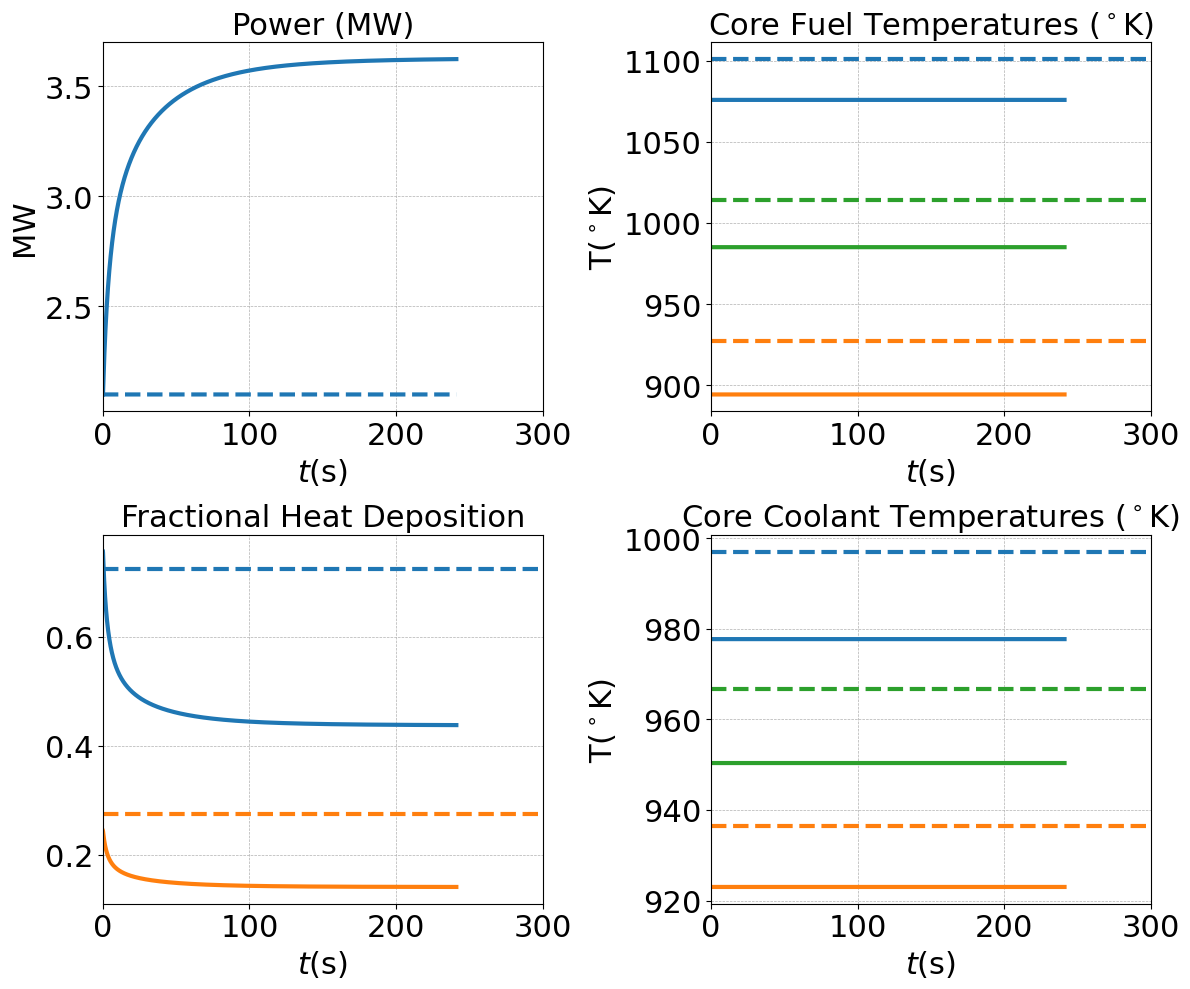

In [171]:
fig,axs = plt.subplots(2,2,figsize=(12,10))

t_0 = 0.0
t_f = 300

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

tls = 22
# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_xlim([t_0, t_f])
    ax.set_title(title,fontsize=tls)
    ax.set_xlabel(x_label,fontsize=tls)
    ax.set_ylabel(y_label,fontsize=tls)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks,labelsize = tls)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize = tls)
    ax.set_yscale(y_scale)

lw = 3
# power
update_axis_style(axs[0,0], 'Power (MW)', r"$t$(s)", "MW")
axs[0,0].plot(T,P*n.y_out,color=colors[0],linewidth=lw)
axs[0,0].plot(T,P*np.ones(len(T)),linestyle='--',color=colors[0],linewidth=lw)

# Core Node Temperatures
update_axis_style(axs[0,1], r"Core Fuel Temperatures ($^\circ$K)")
axs[0,1].set_xlim([t_0,t_f])
axs[0,1].plot(T,[s[c_f2.index] for s in sol_jit],label="fuel outlet, msrDynamics",color=colors[0],linewidth=lw) 
axs[0,1].axhline(y=F_to_K(1522),label="fuel outlet, ORNL-1845",linestyle="--",color=colors[0],linewidth=lw) 
axs[0,1].plot(T,[(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2 for s in sol_jit],label="fuel inlet, msrDynamics",color=colors[1],linewidth=lw) 
axs[0,1].axhline(y=F_to_K(1209),label="fuel inlet, ORNL-1845",linestyle="--",color=colors[1],linewidth=lw) 
axs[0,1].plot(T,[(s[c_f2.index]+(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2)/2 for s in sol_jit],label="Mean, msrDynamics",color=colors[2],linewidth=lw) 
axs[0,1].axhline(y=(F_to_K(1522)+F_to_K(1209))/2,label="Mean, ORNL-1845",linestyle="--",color=colors[2],linewidth=lw) 
axs[0,1].set_xlabel(r"$t$(s)")
axs[0,1].set_ylabel(r"T($^\circ$K)")
# axs[0].legend()

# Core Node Temperatures
update_axis_style(axs[1,1], r"Core Coolant Temperatures ($^\circ$K)")
axs[1,1].set_xlim([t_0,t_f])
axs[1,1].plot(T,[s[c_c2.index] for s in sol_jit],label="coolant outlet, msrDynamics",color=colors[0],linewidth=lw) 
axs[1,1].axhline(y=F_to_K(1335),label="coolant outlet, ORNL-1845",linestyle="--",color=colors[0],linewidth=lw) 
axs[1,1].plot(T,[(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2 for s in sol_jit],label="coolant inlet, msrDynamics",color=colors[1],linewidth=lw) 
axs[1,1].axhline(y=F_to_K(1226),label="coolant inlet, ORNL-1845",linestyle="--",color=colors[1],linewidth=lw) 
axs[1,1].plot(T,[(s[c_c2.index]+(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2)/2 for s in sol_jit],label="Mean, msrDynamics",color=colors[2],linewidth=lw) 
axs[1,1].axhline(y=(F_to_K(1335)+F_to_K(1226))/2,label="Mean, ORNL-1845",linestyle="--",color=colors[2],linewidth=lw) 
axs[1,1].set_xlabel(r"$t$(s)")
axs[1,1].set_ylabel(r"T($^\circ$K)")
# axs[1,1].legend()

# Core Node Temperatures
update_axis_style(axs[1,0], r"Fractional Heat Deposition")
axs[1,0].set_xlim([t_0,t_f])
axs[1,0].axhline(y=1.52/2.1,label="Fractional Power Extraction: Fuel, ORNL",linestyle="--",color=colors[0],linewidth=lw)
axs[1,0].plot(T,[(s[c_f2.index]-(s[hx_fh1_f2.index]+s[hx_fh2_f2.index])/2)*W_f*scp_f/(P*s[n.index]) for s in sol_jit],label="Fractional Power Extraction: Fuel, msrDynamics",linewidth=lw) 
axs[1,0].axhline(y=0.577/2.1,label="Fractional Power Extraction: Coolant, ORNL",linestyle="--",color=colors[1],linewidth=lw)
axs[1,0].plot(T,[(s[c_c2.index]-(s[hx_ch1_c2.index]+s[hx_ch2_c2.index])/2)*W_c*scp_c/(P*s[n.index]) for s in sol_jit],label="Fractional Power Extraction: Coolant, msrDynamics",color=colors[1],linewidth=lw) 
axs[1,0].set_xlabel(r"$t$(s)")
# axs[1,0].legend()


plt.tight_layout()

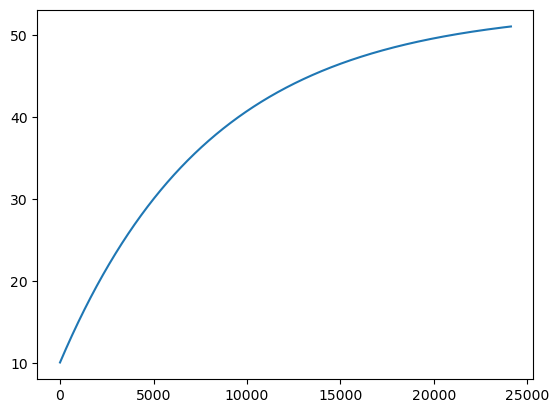

In [172]:
plt.plot(C1.y_out)